In [ ]:
'''
Projeto - Análise de dados de incêndios florestais
Os incêndios florestais são um grave problema para preservação das Florestas Tropicais. Compreender a frequeência de incêndios florestais
em uma séria temporal pode ajudar a tomar medidas para evitá-los. O Brasil tem a maior floresta tropical do planela a floresta Amazônica.
'''

'\nProjeto - Análise de dados de incêndios florestais\nOs incêndios florestais são um grave problema para preservação das Florestas Tropicais. Compreender a frequeência de incêndios florestais\nem uma séria temporal pode ajudar a tomar medidas para evitá-los. O Brasil tem a maior floresta tropical do planela a floresta Amazônica.\n'

In [ ]:
#Libs Necessárias

#Modelagem e Matrizes
import pandas as pd
import numpy as np

#Análise Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Ler a base de dados
base_dados = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

#verificar
base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
#Campos nulos
base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

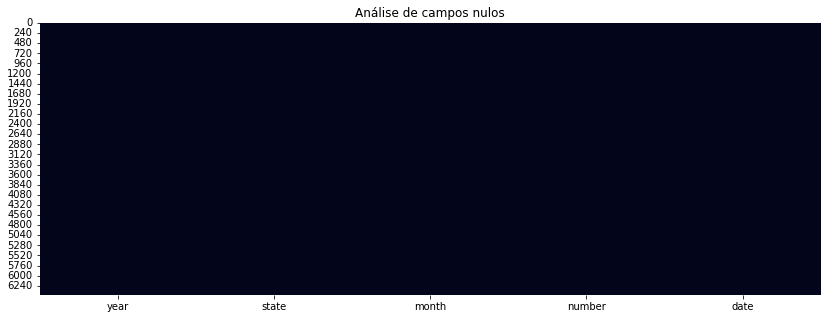

In [ ]:
#Nulos Plot
plt.figure(figsize=(14,5))
plt.title('Análise de campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [ ]:
#Estatisticas
base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [ ]:
#Info
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
#Campos unicos
base_dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [ ]:
#Análise por ano dos incendios
analise = base_dados.groupby(by=['year']).sum().reset_index()

analise.head()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


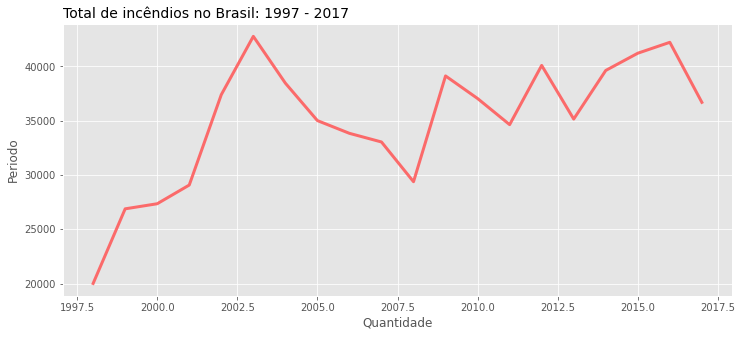

In [ ]:
#Gráfico
#Tamanho
plt.figure(figsize=(12,5))

#Stilo
plt.style.use('ggplot')

#Titulo
plt.title('Total de indêncidios no Brasil: 1997 - 2017', loc='left', fontsize=14)

#Grafico de linha
sns.lineplot(data=analise, x='year', y='number', estimator='sum', lw=3, color='#ff5555', alpha=0.85)
                                                 #numero inteiro  #tamanho da linha      #Clareia a linha
#label
plt.xlabel('Quantidade')
plt.ylabel('Periodo');

In [ ]:
'''
Temos na nossa base de dados os meses também, vamos realizar um boxplot de todos os mêses
e análisar quais são os meses que tem a maior referencia de queimadas.
'''

In [ ]:
#Análise por ano e meses dos incendios
analise02 = base_dados.groupby(by=['year', 'month']).sum().reset_index()

analise02.head()

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000


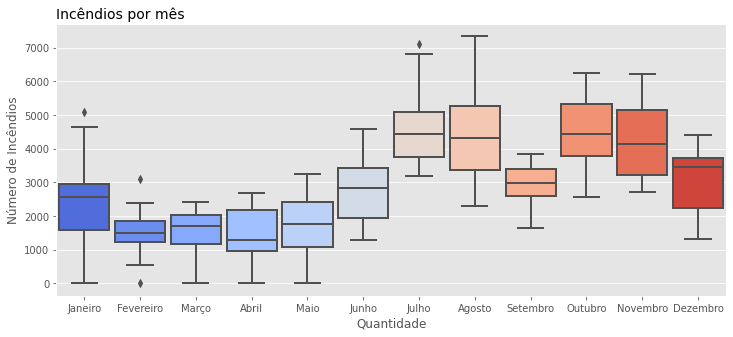

In [ ]:
#tamanho
plt.figure(figsize=(12,5))
#titulo
plt.title('Incêndios por mês', loc='left', fontsize=14)
#boxplot
sns.boxplot(data=analise02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

#label
plt.xlabel('Quantidade')
plt.ylabel('Número de Incêndios');

In [ ]:
'''
Verificando os estados que geram mais números de queimadas
'''

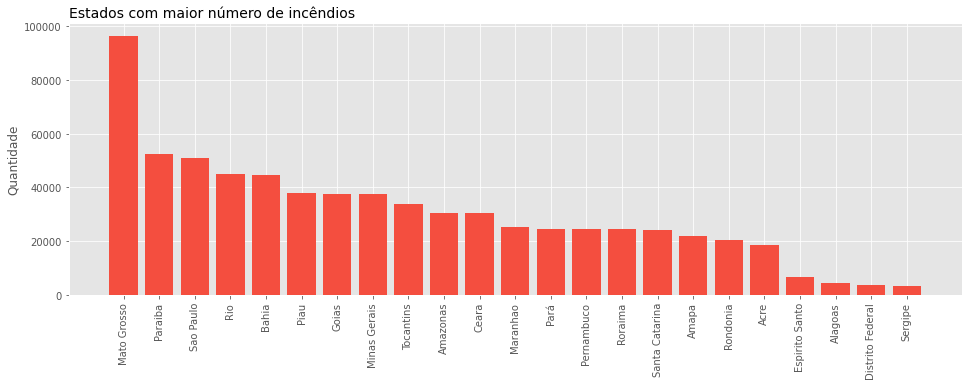

In [ ]:
#Análise por ano dos incendios
analise03 = base_dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)
                                                                #Filtrando            #Ordena do maior para o menor
#tamanho
plt.figure(figsize=(16,5))
#titulo
plt.title('Estados com maior número de incêndios', loc='left', fontsize=14)

#Gráfico
plt.bar(analise03.state, analise03['number'], color='#f44e3f');

#label
plt.ylabel('Quantidade');
plt.xticks(rotation=90);

In [ ]:
'''
Pegar o top 10 e fazer uma curva anual deles para verificar se foi da historia do estado ou em qual momento (ano)
subiu as queimadas nesses top 10 de estados com maiores queimadas
'''

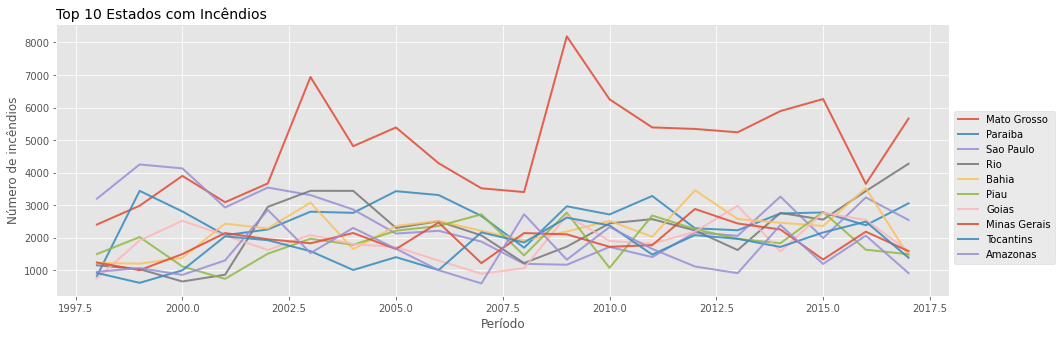

In [ ]:
#Pegando os 10 estados com maiores queimadas
lista_top10 = analise03['state'][0:10].values

#tamanho
plt.figure(figsize=(16,5))
#titulo
plt.title('Top 10 Estados com Incêndios', loc='left', fontsize=14)

#loop para passar em cada valor do top10
for coluna in lista_top10: 
  #Filtrar o estado
  filtro = base_dados.loc[base_dados['state'] == coluna]

  #Agrupar os valores para sumarizar
  analise_local = filtro.groupby(by=['year']).sum().reset_index()

  #plot
  sns.lineplot(data=analise_local, x='year', y='number', lw=2, alpha=0.85)

#label
plt.xlabel('Período')
plt.ylabel('Número de incêndios');

#legenda
plt.legend(lista_top10 , bbox_to_anchor=(1, 0.7));

In [ ]:
#Plot Geográfico

#Gerando os estados por ordem alfabetica
Estados = analise03.sort_values('state')['state'].values

#Gerando os valores - Mantendo os valores 
Valores = analise03.sort_values('state')['number'].values

#Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]    

#Organização dos dados
dicionario = {
    'Estados': Estados,
    'Latitude': Lat,
    'Longitude': Log,
    'Incêndios': Valores
}

#Lendo o Dicionario - criando uma base de dados nova
analise_geografica = pd.DataFrame(dicionario)
analise_geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [ ]:
#fazendo o plot
import plotly.express as px

#Mapa de calor Geografico
px.density_mapbox(
    analise_geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)